In [122]:
!pip install specklepy --upgrade

In [123]:
from specklepy.api.client import SpeckleClient
from specklepy.api.credentials import get_default_account
host = "https://speckle.xyz/"
client = SpeckleClient(host=host)
# replace with your token
token = "2c502e6c05d55ed80942583c6fa6775f96db91ee1e"
client.authenticate_with_token(token=token)

In [124]:
from specklepy.transports.server import ServerTransport
# replace with your stream id
streamId = "14568be237"
stream = client.stream.get(id=streamId)

transport = ServerTransport(client=client, stream_id=streamId)
transport

ServerTransport(url='https://speckle.xyz', stream_id='14568be237', account=Account(email: chuongpqvn@gmail.com, server: https://speckle.xyz, isDefault: True), saved_obj_count=0, session=<requests.sessions.Session object at 0x00000227E7CEC7C0>, _batch_sender=<specklepy.transports.server.batch_sender.BatchSender object at 0x00000227E7CECBE0>)

In [125]:
from specklepy.api import operations
commit = client.commit.list(stream_id=streamId)[0]
print(commit)
received_base = operations.receive(commit.referencedObject, remote_transport=transport)
received_base

Commit( id: 92afa8cd3f, message: Send 6 clashes test from Navisworks, referencedObject: afc8470062c5fa4fe96aa8bba1049797, authorName: Hồ Văn Chương, branchName: main, createdAt: 2023-01-19 03:55:16.067000+00:00 )


Base(id: afc8470062c5fa4fe96aa8bba1049797, speckle_type: Base, totalChildrenCount: 0)

In [126]:
clashtests = received_base["ClashTests"]
clashtests

[Base(id: 0cb02822a70ad66b61b8a784c9d845b1, speckle_type: ClashModel.ClashTest, totalChildrenCount: 0),
 Base(id: d2eed40c3a5bc712c46059ee7e7ac83d, speckle_type: ClashModel.ClashTest, totalChildrenCount: 0),
 Base(id: 4f311331c7614b6d97a435cf90d67b9a, speckle_type: ClashModel.ClashTest, totalChildrenCount: 0),
 Base(id: 722148628d8c266b7c424923fcc79948, speckle_type: ClashModel.ClashTest, totalChildrenCount: 0),
 Base(id: 7434242d668d3a8749cb8f4645bd71da, speckle_type: ClashModel.ClashTest, totalChildrenCount: 0),
 Base(id: 9b27bf88496faa8877e482b2680891af, speckle_type: ClashModel.ClashTest, totalChildrenCount: 0)]

In [127]:
import pandas as pd
tests = []
for i in range(len(clashtests)):
    test = {}
    test["Name"] = clashtests[i].Name
    test["Count"] = clashtests[i].ClashCount
    test["Guid"] = clashtests[i].Guid
    test["LastRun"] = clashtests[i].LastRun
    tests.append(test)   
dfClashTests =  pd.DataFrame(tests).sort_values(by = "Name", ascending = True)
dfClashTests

,Name,Count,Guid,LastRun
0,Test 1,2051,fdbb31e2-3d0a-4f23-90db-2dd763fde42a,2023-01-16T18:05:58.0000000Z
1,Test 2,593,2e36a211-c724-498c-b73b-6417c93025f5,2023-01-18T11:33:53.0000000Z
2,Test 3,764,3ac4763b-71aa-49ab-bbe7-398d98274c06,2023-01-18T11:34:46.0000000Z
3,Test 4,86,d4b0bbd9-1236-4254-a9a1-085e4d45c876,2023-01-18T11:34:05.0000000Z
4,Test 5,597,687c7032-6894-49b5-9dc2-9cbc282d82d5,2023-01-18T11:34:13.0000000Z
5,Test 6,820,f7a7df71-1f85-4414-9489-8ba81125d385,2023-01-18T11:34:59.0000000Z


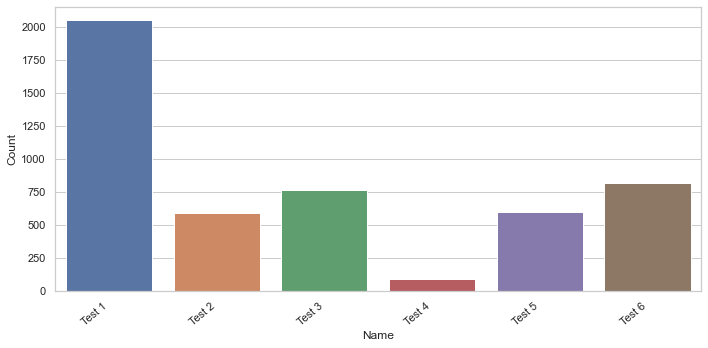

In [128]:
# plot dfClashTests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Name", y="Count", data=dfClashTests)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [129]:
import pandas as pd
clashs = []
for i in range(len(clashtests)):
    clashsData = clashtests[i].Clashes
    for j in range(len(clashsData)):
        clashsdic = {}
        clashsdic["Name"] = clashsData[j].Name
        clashsdic["Guid"] = clashsData[j].Guid
        clashsdic["Level"] = clashsData[j].Level
        clashsdic["Status"] = clashsData[j].Status
        clashsdic["Distance"] = clashsData[j].Distance
        clashsdic["GridIntersect"] = clashsData[j].GridIntersect
        clashs.append(clashsdic)
dfClashes = pd.DataFrame(clashs).sort_values(by = "Name", ascending = True)
dfClashes.head(10)

,Name,Guid,Level,Status,Distance,GridIntersect
0,Clash1,74060d31-b6d7-4625-a229-ae49c79a77a3,Ceiling,New,-1.476378,B(-1)-7(-1)
3408,Clash1,26617bf5-9142-4848-bb8b-b08baf4e8bc9,,New,-0.196851,
2051,Clash1,1dea3642-9e25-480d-89c5-a8fcd69c9eaf,,New,-1.153989,
4314,Clash1,64fc8bfd-4cb7-4468-be8f-82c5d7cfb66a,,Active,-1.153989,
3494,Clash1,d49e4ce7-7cbd-42d5-82cf-b91a6a2ae29a,,New,-1.153989,
3405,Clash1,55280d2d-2c79-44d7-9703-089d7d7f9668,Level 1,Active,0.000000,A(6)-6
3503,Clash10,3bbe4f76-b781-430b-8287-4b477116ad04,Level 1,Approved,-0.164044,F-6
9,Clash10,08500953-aec7-4aa0-a9dd-3b19bc731ea9,,New,-0.984252,
2650,Clash10,185c3240-c530-48ae-92b4-a0e9a333e84f,Level 1,Reviewed,-0.295276,E-7(-1)
3417,Clash10,4379022d-e887-4fca-9075-899199a55250,,New,-0.032569,


In [130]:
# group dfClashes by Level 
dfClashes.groupby("Level").value_counts()

Level      Name      Guid                                  Status  Distance       GridIntersect
           Clash1    1dea3642-9e25-480d-89c5-a8fcd69c9eaf  New     -1.153989e+00                   1
                     26617bf5-9142-4848-bb8b-b08baf4e8bc9  New     -1.968513e-01                   1
           Clash413  5a74b840-b9bc-4ed9-a51d-a920e8c40c03  New     -1.421085e-14                   1
           Clash415  8775a4cf-29e7-4523-aca0-9762da194dd2  New     -3.879777e-08                   1
                     08a4b7b3-0b5d-4564-b124-e68751b16bca  New     -1.421085e-14                   1
                                                                                                  ..
Roof Line  Clash465  5dc4e13d-7954-408c-b5f9-43b2a708d0a0  New     -8.366394e-02  B-6              1
           Clash358  1a432881-ec3f-491d-9764-145300b322c3  New     -1.407305e-01  B-2              1
           Clash349  71f58bd7-7a6a-4680-8acd-2bd7cde6f5bf  New     -1.497990e-01  B-6           

In [131]:
# series of grid intersect 
dfClashes["GridIntersect"].value_counts()


               1375
C-5             289
B-2             151
C-6             129
B-5             123
               ... 
E(1)-7(-1)        1
C(-1)-7(-1)       1
D(-1)-7(-1)       1
A(3)-6            1
A-1(-1)           1
Name: GridIntersect, Length: 153, dtype: int64

In [132]:
# series of grid intersect 
dfClashes["Level"].value_counts()

Level 1      3049
             1375
Ceiling       358
Roof Line      77
Level 2        52
Name: Level, dtype: int64

In [133]:
# filter dfClashes with column "Level" = "Level 1"
dfClashLevel1 = dfClashes[dfClashes["Level"] == "Level 1"]
print("Count Clash Level 1: ", len(dfClashLevel1))
dfClashLevel1.head(10)

Count Clash Level 1:  3049


,Name,Guid,Level,Status,Distance,GridIntersect
3405,Clash1,55280d2d-2c79-44d7-9703-089d7d7f9668,Level 1,Active,0.000000,A(6)-6
3503,Clash10,3bbe4f76-b781-430b-8287-4b477116ad04,Level 1,Approved,-0.164044,F-6
2650,Clash10,185c3240-c530-48ae-92b4-a0e9a333e84f,Level 1,Reviewed,-0.295276,E-7(-1)
2060,Clash10,82985c26-ae8a-42b6-93c2-0de75d71eb90,Level 1,Resolved,-0.164044,F-6
4319,Clash10,185a6bdc-6aac-4c67-9fb5-3ecc66d7ce95,Level 1,Active,-0.255905,C-7
3593,Clash100,44c7867a-8975-4ee7-9543-a8215af957ea,Level 1,New,-0.009728,B-4(-1)
2150,Clash100,b58377a8-73a7-4617-b5e8-f540144f90b6,Level 1,New,-0.009728,B-4(-1)
2151,Clash101,27a21946-27b8-4e89-8aa5-1970c793f72b,Level 1,New,-0.009728,B-3
3594,Clash101,ec196899-fb0d-490c-b8f4-1a0295bd9d40,Level 1,New,-0.009728,B-3
2741,Clash101,1778fe7d-d5b6-42ef-a436-cd4abc052ff4,Level 1,New,-0.038398,G-7(-1)


In [136]:
# check how many clashes "Resolved" In Level 01
dfClashLevel1Resolved = dfClashLevel1[dfClashLevel1["Status"] == "Resolved"]
print("Number of Clash Resolved: ", len(dfClashLevel1Resolved))
dfClashLevel1Resolved.head(10)

Number of Clash Resolved:  14


,Name,Guid,Level,Status,Distance,GridIntersect
2060,Clash10,82985c26-ae8a-42b6-93c2-0de75d71eb90,Level 1,Resolved,-0.164044,F-6
2061,Clash11,3bf412b5-df34-45d7-9c2b-e2fd001b989e,Level 1,Resolved,-0.164044,F-6(1)
2751,Clash111,31ce58b7-447a-4e58-b198-71213b5c385a,Level 1,Resolved,-0.032808,C-1
2754,Clash114,6c4bce50-aea0-4a18-bf28-fb9e5d1605a7,Level 1,Resolved,-0.031159,G-7
2755,Clash115,23e2af03-6cb4-476f-aefb-eeb88749b953,Level 1,Resolved,-0.031159,G-5
2756,Clash116,61d1988c-234d-4381-8846-33d520293f8a,Level 1,Resolved,-0.027878,G-7
2757,Clash117,966abb3b-0a25-4d9c-a101-91c81f24bab1,Level 1,Resolved,-0.026168,B-5
2758,Clash118,e7b766a3-aa5a-4d12-b908-683adeacd995,Level 1,Resolved,-0.023761,C-4
2759,Clash119,af472624-567a-48c5-a6d1-8e7a873cf249,Level 1,Resolved,-0.023761,C-4
2063,Clash13,93afd68d-2be2-400b-be97-59b832256a50,Level 1,Resolved,-0.163930,A-4


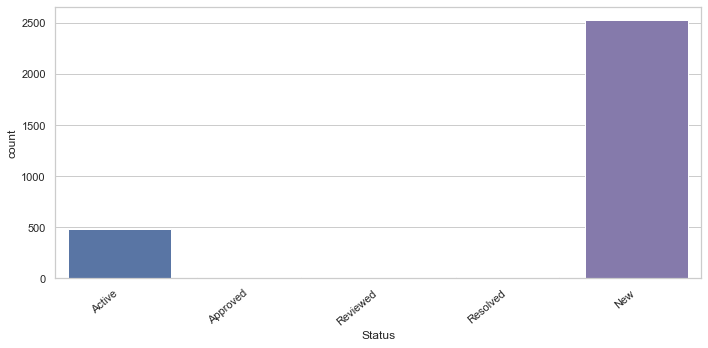

In [138]:
# Visualize the dfClashLevel1 by category column Status
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Status", data=dfClashLevel1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()